In [1]:
%matplotlib inline

from movielens import MovieLens
from linUCB import LinUCB
import numpy as np
import matplotlib.pyplot as plt

In [11]:
ucb = LinUCB(alpha=0.1, dataset=None, max_items=100, allow_selecting_known_arms=True)

data\movielens\ml-100k.zip is already downloaded.
Created a rating matrix of shape=(943, 1682) and dtype=float64 from u.data.
Created a genre matrix of shape=(1682, 19) and dtype=float64 from u.item.
Created a titles matrix of shape=(1682,) and dtype=object from u.item.
Statistics about self.R:
Number of users:           943
Number of items:           1682
Total number of ratings:   1586126
Known ratings:             100000
Known positive ratings:    6110
Known negative ratings:    0
Ratio of known ratings:    0.06304669364224531
Ratio of positive ratings: 0.0038521529815411892
Ratio of negative ratings: 0.0
Avg number of positive ratings per user: 6.47932131495228 +- 20.79984263455138
Avg number of negative ratings per user: 0.0 +- 0.0
Shrinked rating matrix from (943, 1682) to (56, 100).

After shrinking:
Number of users:           56
Number of items:           100
Total number of ratings:   5600
Known ratings:             903
Known positive ratings:    42
Known negative ratings:    

In [12]:
print('R:\n', ucb.dataset.R)

R:
 [[5. 3. 4. ... 4. 3. 5.]
 [4. 0. 0. ... 0. 0. 5.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [4. 0. 0. ... 0. 0. 5.]
 [0. 0. 0. ... 0. 0. 0.]
 [4. 0. 0. ... 4. 0. 0.]]


In [20]:
ucb.dataset.R.shape

(56, 100)

In [22]:
np.mean(ucb.dataset.R!=0,axis=1)

array([1.  , 0.3 , 0.25, 0.09, 0.73, 0.93, 0.89, 0.38, 0.08, 0.92, 0.94,
       0.8 , 0.93, 0.73, 0.22, 0.83, 0.72, 0.91, 0.93, 0.18, 0.36, 0.8 ,
       0.77, 0.71, 0.96, 0.93, 0.82, 0.77, 0.94, 0.28, 0.82, 0.34, 0.23,
       0.82, 0.94, 0.04, 0.61, 0.72, 0.04, 0.07, 0.89, 0.89, 0.89, 0.79,
       0.21, 0.6 , 0.39, 0.22, 0.82, 0.36, 0.14, 0.92, 0.93, 0.17, 0.51,
       0.85])

In [15]:
avg_reward = ucb.run(num_epochs=100)

Finished epoch 0/100 with avg reward 0.4107142857142857 in 1.844301462173462s
Finished epoch 1/100 with avg reward 0.44642857142857145 in 1.7159230709075928s
Finished epoch 2/100 with avg reward 0.48214285714285715 in 1.736358404159546s
Finished epoch 3/100 with avg reward 0.4642857142857143 in 1.7154316902160645s
Finished epoch 4/100 with avg reward 0.4107142857142857 in 1.7268879413604736s
Finished epoch 5/100 with avg reward 0.4107142857142857 in 1.7383522987365723s
Finished epoch 6/100 with avg reward 0.4107142857142857 in 1.7029716968536377s
Finished epoch 7/100 with avg reward 0.39285714285714285 in 1.831728219985962s
Finished epoch 8/100 with avg reward 0.48214285714285715 in 2.0186245441436768s
Finished epoch 9/100 with avg reward 0.48214285714285715 in 2.1193525791168213s
Finished epoch 10/100 with avg reward 0.44642857142857145 in 2.0266032218933105s
Finished epoch 11/100 with avg reward 0.42857142857142855 in 2.498939275741577s
Finished epoch 12/100 with avg reward 0.4821428

Text(0.5, 1.0, 'LinUCB: Fixed rewards')

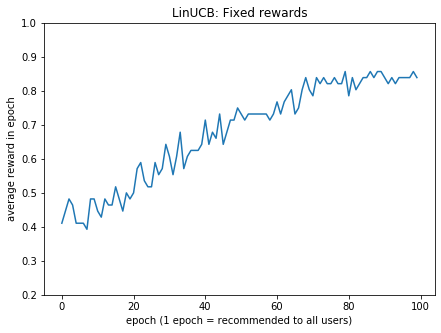

In [16]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 7, 5
plt.plot(range(len(avg_reward)), avg_reward)
plt.ylabel('average reward in epoch')
plt.ylim(0.2, 1)
plt.xlabel('epoch (1 epoch = recommended to all users)')
plt.title('LinUCB: Fixed rewards')

In [10]:
ucb_stochastic = LinUCB(alpha=0.1, dataset=None, max_items=100, 
                        allow_selecting_known_arms=True, fixed_rewards=False, prob_reward_p=0.9)

data\movielens\ml-100k.zip is already downloaded.
Created a rating matrix of shape=(943, 1682) and dtype=float64 from u.data.
Created a genre matrix of shape=(1682, 19) and dtype=float64 from u.item.
Created a titles matrix of shape=(1682,) and dtype=object from u.item.
Statistics about self.R:
Number of users:           943
Number of items:           1682
Total number of ratings:   1586126
Known ratings:             100000
Known positive ratings:    6110
Known negative ratings:    0
Ratio of known ratings:    0.06304669364224531
Ratio of positive ratings: 0.0038521529815411892
Ratio of negative ratings: 0.0
Avg number of positive ratings per user: 6.47932131495228 +- 20.79984263455138
Avg number of negative ratings per user: 0.0 +- 0.0
Shrinked rating matrix from (943, 1682) to (56, 100).

After shrinking:
Number of users:           56
Number of items:           100
Total number of ratings:   5600
Known ratings:             903
Known positive ratings:    42
Known negative ratings:    

In [6]:
print('R:\n', ucb_stochastic.dataset.R)

R:
 [[ 1. -1.  1. ...  1. -1.  1.]
 [ 1.  0.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 1.  0.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 1.  0.  0. ...  1.  0.  0.]]


In [7]:
avg_reward_stochastic = ucb_stochastic.run(num_epochs=50)

Finished epoch 0/50 with avg reward 0.42857142857142855 in 1.897507667541504s
Finished epoch 1/50 with avg reward 0.5535714285714286 in 1.8371059894561768s
Finished epoch 2/50 with avg reward 0.5178571428571429 in 1.7672905921936035s
Finished epoch 3/50 with avg reward 0.6428571428571429 in 1.8450672626495361s
Finished epoch 4/50 with avg reward 0.6785714285714286 in 2.011620044708252s
Finished epoch 5/50 with avg reward 0.6785714285714286 in 2.0191493034362793s
Finished epoch 6/50 with avg reward 0.6071428571428571 in 1.770301342010498s
Finished epoch 7/50 with avg reward 0.7142857142857143 in 1.9201345443725586s
Finished epoch 8/50 with avg reward 0.7321428571428571 in 1.740363597869873s
Finished epoch 9/50 with avg reward 0.6785714285714286 in 1.7264180183410645s
Finished epoch 10/50 with avg reward 0.75 in 1.819180965423584s
Finished epoch 11/50 with avg reward 0.8035714285714286 in 1.7762656211853027s
Finished epoch 12/50 with avg reward 0.8035714285714286 in 1.8007309436798096s
F

Text(0.5, 1.0, 'LinUCB: Stochastic rewards with p=0.9')

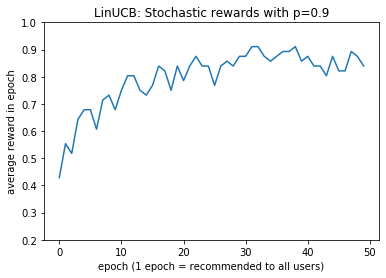

In [8]:
plt.plot(range(len(avg_reward_stochastic)), avg_reward_stochastic)
plt.ylabel('average reward in epoch')
plt.ylim(0.2, 1)
plt.xlabel('epoch (1 epoch = recommended to all users)')
plt.title('LinUCB: Stochastic rewards with p=0.9')

In [9]:
num_to_each_user = 10
np.random.randint(2, size=num_to_each_user) * 2 - np.ones(shape=(num_to_each_user,),
                                                                                    dtype=int)

array([ 1,  1,  1,  1, -1, -1,  1, -1, -1,  1])

In [13]:
np.random.randint(2, size=num_to_each_user)

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [14]:
np.average(np.array([1,2,3]))

2.0

In [17]:
np.array([[1,2],[3,4]])[1]

array([3, 4])

In [18]:
100%30

10

In [2]:
from greedy import Greedy

In [18]:
gred = Greedy(alpha=0.1, dataset=None, max_items=100, allow_selecting_known_arms=True)

data\movielens\ml-100k.zip is already downloaded.
Created a rating matrix of shape=(943, 1682) and dtype=float64 from u.data.
Positive ratings (>=4) turned to 1, negative to -1, unknown to 0
Created a genre matrix of shape=(1682, 19) and dtype=float64 from u.item.
Created a titles matrix of shape=(1682,) and dtype=object from u.item.
Statistics about self.R:
Number of users:           943
Number of items:           1682
Total number of ratings:   1586126
Known ratings:             100000
Known positive ratings:    55375
Known negative ratings:    44625
Ratio of known ratings:    0.06304669364224531
Ratio of positive ratings: 0.034912106604393346
Ratio of negative ratings: 0.028134587037851974
Avg number of positive ratings per user: 58.72216330858961 +- 54.67211827074995
Avg number of negative ratings per user: 47.32237539766702 +- 58.41143787053165
Shrinked rating matrix from (943, 1682) to (56, 100).

After shrinking:
Number of users:           56
Number of items:           100
Total

In [19]:
avg_reward = gred.run(num_epochs=200)

Finished epoch 0/200 with avg reward 0.375 in 0.01347661018371582s
Finished epoch 1/200 with avg reward 0.39285714285714285 in 0.012967586517333984s
Finished epoch 2/200 with avg reward 0.39285714285714285 in 0.018947839736938477s
Finished epoch 3/200 with avg reward 0.39285714285714285 in 0.015962600708007812s
Finished epoch 4/200 with avg reward 0.4107142857142857 in 0.010989665985107422s
Finished epoch 5/200 with avg reward 0.44642857142857145 in 0.009941577911376953s
Finished epoch 6/200 with avg reward 0.44642857142857145 in 0.011968374252319336s
Finished epoch 7/200 with avg reward 0.48214285714285715 in 0.00997161865234375s
Finished epoch 8/200 with avg reward 0.5 in 0.009973287582397461s
Finished epoch 9/200 with avg reward 0.5357142857142857 in 0.009973287582397461s
Finished epoch 10/200 with avg reward 0.5357142857142857 in 0.009973287582397461s
Finished epoch 11/200 with avg reward 0.5357142857142857 in 0.009007692337036133s
Finished epoch 12/200 with avg reward 0.5535714285

Finished epoch 110/200 with avg reward 0.6428571428571429 in 0.013996601104736328s
Finished epoch 111/200 with avg reward 0.6428571428571429 in 0.014934539794921875s
Finished epoch 112/200 with avg reward 0.6428571428571429 in 0.011969327926635742s
Finished epoch 113/200 with avg reward 0.6428571428571429 in 0.014962196350097656s
Finished epoch 114/200 with avg reward 0.6428571428571429 in 0.019978761672973633s
Finished epoch 115/200 with avg reward 0.6428571428571429 in 0.008942365646362305s
Finished epoch 116/200 with avg reward 0.6428571428571429 in 0.007976770401000977s
Finished epoch 117/200 with avg reward 0.6428571428571429 in 0.009973287582397461s
Finished epoch 118/200 with avg reward 0.6428571428571429 in 0.008975982666015625s
Finished epoch 119/200 with avg reward 0.6428571428571429 in 0.007977962493896484s
Finished epoch 120/200 with avg reward 0.6428571428571429 in 0.007978677749633789s
Finished epoch 121/200 with avg reward 0.6428571428571429 in 0.008975744247436523s
Fini

In [5]:
gred.dataset.R

array([[ 1., -1.,  1., ...,  1., -1.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.]])

Text(0.5, 1.0, 'LinUCB: Fixed rewards')

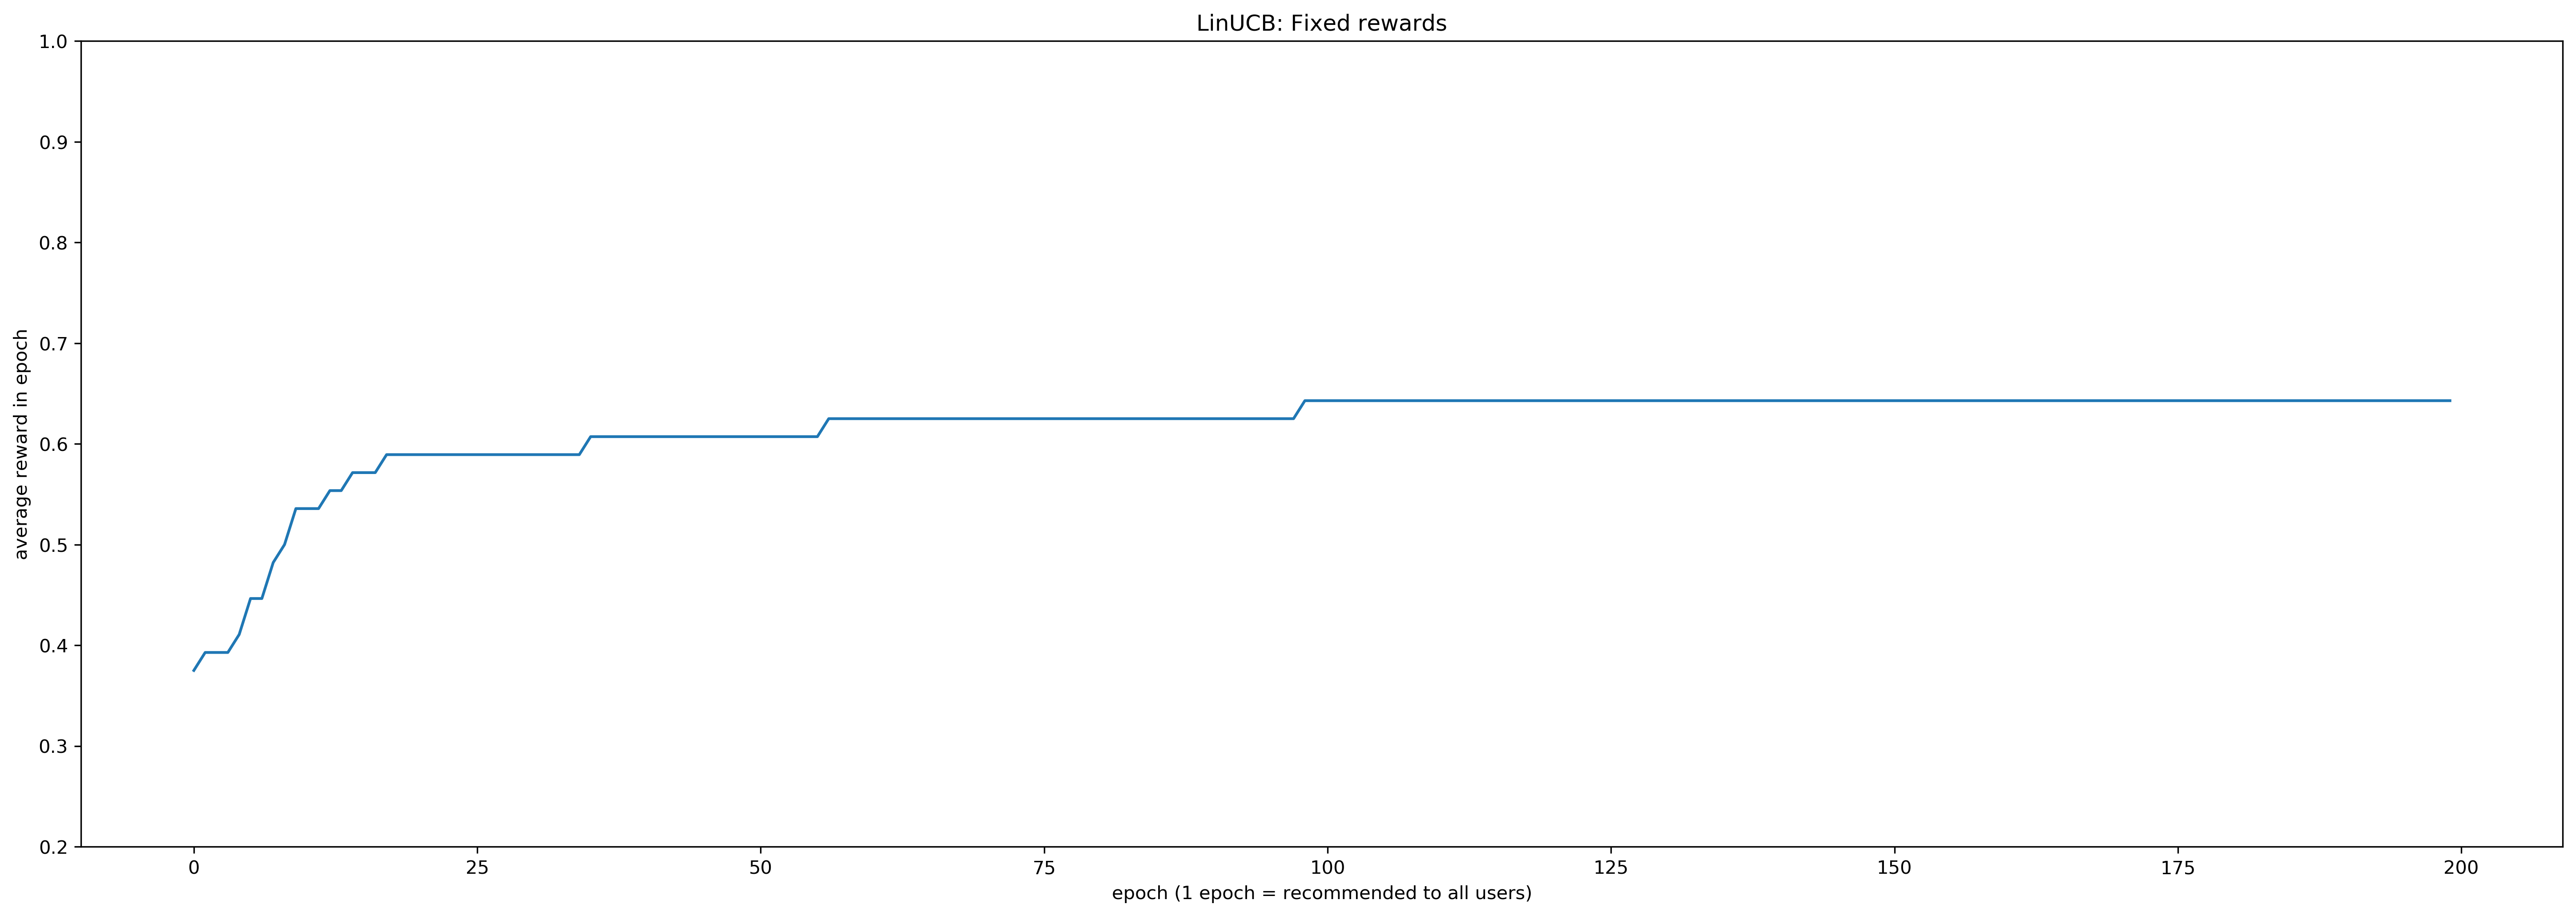

In [20]:
from matplotlib.pylab import rcParams
plt.figure(dpi=300,figsize=(24,8))
rcParams['figure.figsize'] = 7, 5
plt.plot(range(len(avg_reward)), avg_reward)
plt.ylabel('average reward in epoch')
plt.ylim(0.2, 1)
plt.xlabel('epoch (1 epoch = recommended to all users)')
plt.title('LinUCB: Fixed rewards')

In [8]:
import random

In [10]:
random.random()

0.5771414296972569

In [16]:
random.randint(1,100)

89

In [2]:
from greedy_epsilon import GreedyEpsilon

In [3]:
gred_e = GreedyEpsilon(alpha=0.1, dataset=None, max_items=100, allow_selecting_known_arms=True)

data\movielens\ml-100k.zip is already downloaded.
Created a rating matrix of shape=(943, 1682) and dtype=float64 from u.data.
Positive ratings (>=4) turned to 1, negative to -1, unknown to 0
Created a genre matrix of shape=(1682, 19) and dtype=float64 from u.item.
Created a titles matrix of shape=(1682,) and dtype=object from u.item.
Statistics about self.R:
Number of users:           943
Number of items:           1682
Total number of ratings:   1586126
Known ratings:             100000
Known positive ratings:    55375
Known negative ratings:    44625
Ratio of known ratings:    0.06304669364224531
Ratio of positive ratings: 0.034912106604393346
Ratio of negative ratings: 0.028134587037851974
Avg number of positive ratings per user: 58.72216330858961 +- 54.67211827074995
Avg number of negative ratings per user: 47.32237539766702 +- 58.41143787053165
Shrinked rating matrix from (943, 1682) to (56, 100).

After shrinking:
Number of users:           56
Number of items:           100
Total

In [4]:
avg_reward = gred_e.run(num_epochs=500)

Finished epoch 0/200 with avg reward 0.32142857142857145 in 0.014960527420043945s
Finished epoch 1/200 with avg reward 0.32142857142857145 in 0.013995170593261719s
Finished epoch 2/200 with avg reward 0.32142857142857145 in 0.020910978317260742s
Finished epoch 3/200 with avg reward 0.35714285714285715 in 0.013964176177978516s
Finished epoch 4/200 with avg reward 0.4107142857142857 in 0.010967493057250977s
Finished epoch 5/200 with avg reward 0.48214285714285715 in 0.010970830917358398s
Finished epoch 6/200 with avg reward 0.44642857142857145 in 0.009973764419555664s
Finished epoch 7/200 with avg reward 0.5 in 0.008976459503173828s
Finished epoch 8/200 with avg reward 0.48214285714285715 in 0.010970354080200195s
Finished epoch 9/200 with avg reward 0.5357142857142857 in 0.009974241256713867s
Finished epoch 10/200 with avg reward 0.5535714285714286 in 0.009972810745239258s
Finished epoch 11/200 with avg reward 0.5357142857142857 in 0.011970758438110352s
Finished epoch 12/200 with avg rew

Finished epoch 112/200 with avg reward 0.6607142857142857 in 0.016954898834228516s
Finished epoch 113/200 with avg reward 0.6428571428571429 in 0.01994609832763672s
Finished epoch 114/200 with avg reward 0.625 in 0.01695394515991211s
Finished epoch 115/200 with avg reward 0.625 in 0.012966394424438477s
Finished epoch 116/200 with avg reward 0.6071428571428571 in 0.012964487075805664s
Finished epoch 117/200 with avg reward 0.6607142857142857 in 0.014960527420043945s
Finished epoch 118/200 with avg reward 0.6071428571428571 in 0.008974552154541016s
Finished epoch 119/200 with avg reward 0.6428571428571429 in 0.012964963912963867s
Finished epoch 120/200 with avg reward 0.6428571428571429 in 0.008978128433227539s
Finished epoch 121/200 with avg reward 0.625 in 0.008975744247436523s
Finished epoch 122/200 with avg reward 0.6071428571428571 in 0.00797891616821289s
Finished epoch 123/200 with avg reward 0.625 in 0.008977413177490234s
Finished epoch 124/200 with avg reward 0.6785714285714286 i

Text(0.5, 1.0, 'LinUCB: Fixed rewards')

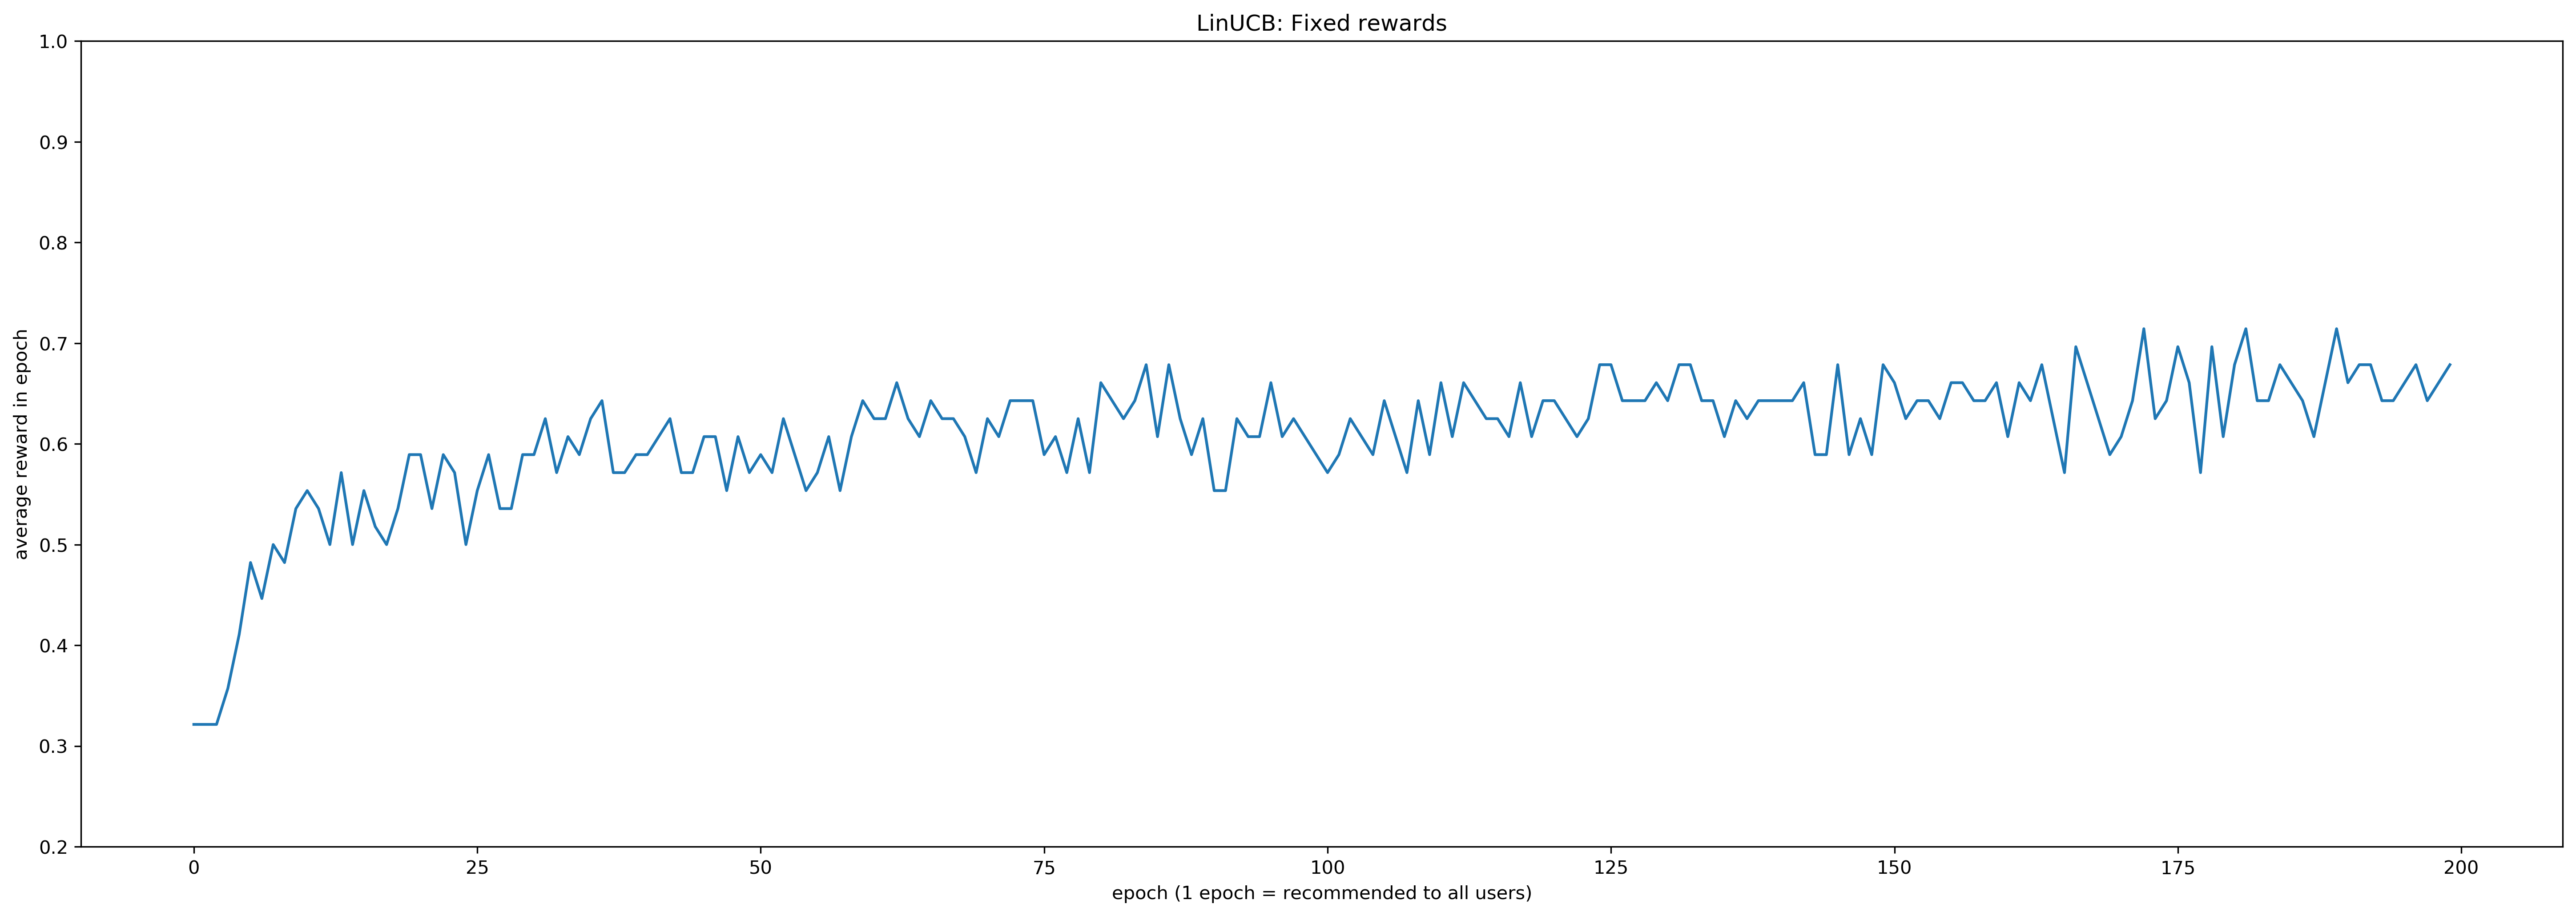

In [5]:
from matplotlib.pylab import rcParams
plt.figure(dpi=300,figsize=(24,8))
rcParams['figure.figsize'] = 7, 5
plt.plot(range(len(avg_reward)), avg_reward)
plt.ylabel('average reward in epoch')
plt.ylim(0.2, 1)
plt.xlabel('epoch (1 epoch = recommended to all users)')
plt.title('LinUCB: Fixed rewards')